In [1]:
# Importing essential libraries
import numpy as np
import pandas as pd

In [2]:
# Loading the dataset
df = pd.read_csv('Spam SMS Collection', sep='\t', names=['label', 'message'])

# **Exploratory Data Analysis (EDA)**
* Exploring NaN values in dataset
* Plotting countplots for Spam vs. Ham



In [3]:
df.shape

(5572, 2)

In [4]:
df.columns

Index(['label', 'message'], dtype='object')

In [5]:
df.dtypes

label      object
message    object
dtype: object

In [6]:
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
df.tail()

,label,message
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [10]:
df.describe(include='object')

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


_**Note: No NaN values** in the dataset._

In [11]:
# Mapping values for label
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

In [12]:
df.head()

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
df.tail()

,label,message
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will ü b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...
5571,0,Rofl. Its true to its name


In [14]:
# Importing essential libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

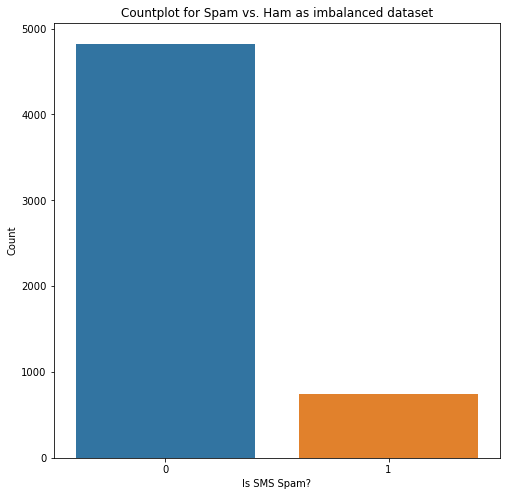

In [15]:
# Countplot for Spam vs. Ham as imbalanced dataset
plt.figure(figsize=(8,8))
g = sns.countplot(x='label', data=df)
p = plt.title('Countplot for Spam vs. Ham as imbalanced dataset')
p = plt.xlabel('Is SMS Spam?')
p = plt.ylabel('Count')

_**Insight:** From the above countplot, it is evident that the **dataset is imbalanced**._

# **Feature Engineering**
*   Handling imbalanced dataset using Oversampling
*   Creating new features e.g. word_count, contains_currency_symbol, contains_numbers, etc.



In [16]:
# Handling imbalanced dataset using Oversampling
only_spam = df[df['label']==1]
print('Number of Spam records: {}'.format(only_spam.shape[0]))
print('Number of Ham records: {}'.format(df.shape[0]-only_spam.shape[0]))

Number of Spam records: 747
Number of Ham records: 4825


In [18]:
count = int((df.shape[0]-only_spam.shape[0])/only_spam.shape[0])
for i in range(0, count-1):
  data = pd.concat([df, only_spam])

df.shape

(5572, 2)

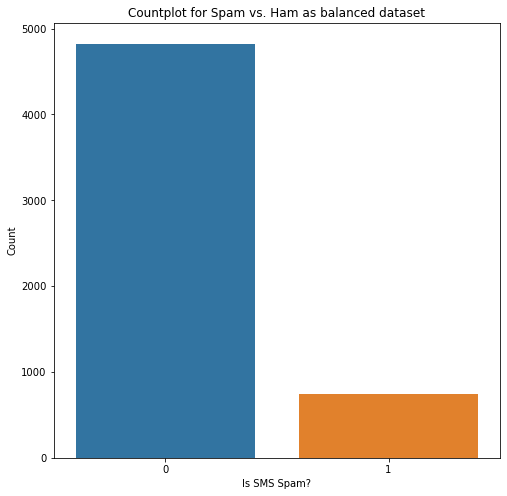

In [19]:
# Countplot for Spam vs. Ham as balanced dataset
plt.figure(figsize=(8,8))
g = sns.countplot(x='label', data=df)
p = plt.title('Countplot for Spam vs. Ham as balanced dataset')
p = plt.xlabel('Is SMS Spam?')
p = plt.ylabel('Count')

In [20]:
# Creating new feature word_count
df['word_count'] = df['message'].apply(lambda x: len(x.split()))

In [21]:
df.head()

,label,message,word_count
0,0,"Go until jurong point, crazy.. Available only ...",20
1,0,Ok lar... Joking wif u oni...,6
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,28
3,0,U dun say so early hor... U c already then say...,11
4,0,"Nah I don't think he goes to usf, he lives aro...",13


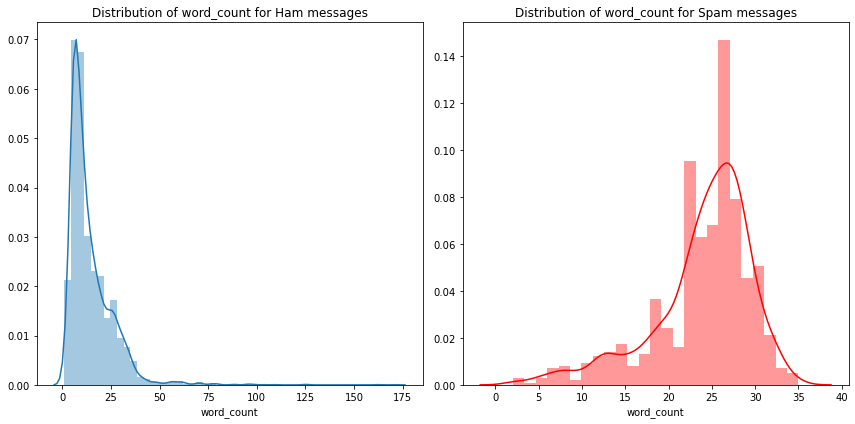

In [22]:
plt.figure(figsize=(12, 6))

# 1-row, 2-column, go to the first subplot
plt.subplot(1, 2, 1)
g = sns.distplot(a=df[df['label']==0].word_count)
p = plt.title('Distribution of word_count for Ham messages')

# 1-row, 2-column, go to the second subplot
plt.subplot(1, 2, 2)
g = sns.distplot(a=df[df['label']==1].word_count, color='red')
p = plt.title('Distribution of word_count for Spam messages')

plt.tight_layout()
plt.show()

_**Insight:** **Spam messages** word_count fall in the range of **15-30 words**, whereas majority of the **Ham messages** fall in the range of **below 25 words**._

In [23]:
# Creating feature contains_currency_symbol
def currency(x):
  currency_symbols = ['€', '$', '¥', '£', '₹']
  for i in currency_symbols:
    if i in x:
      return 1
  return 0

df['contains_currency_symbol'] = df['message'].apply(currency)

In [24]:
df.tail()

,label,message,word_count,contains_currency_symbol
5567,1,This is the 2nd time we have tried 2 contact u...,30,1
5568,0,Will ü b going to esplanade fr home?,8,0
5569,0,"Pity, * was in mood for that. So...any other s...",10,0
5570,0,The guy did some bitching but I acted like i'd...,26,0
5571,0,Rofl. Its true to its name,6,0


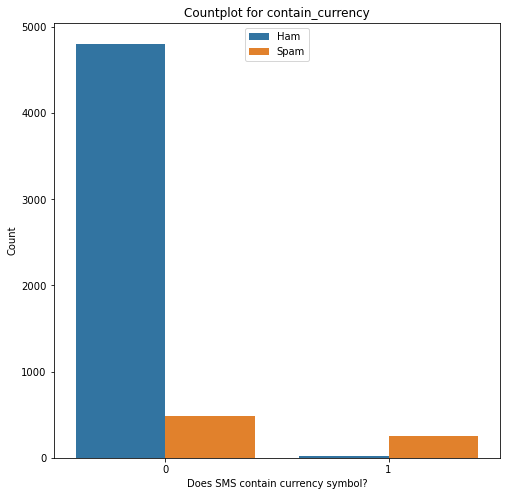

In [25]:
# Countplot for contains_currency_symbol
plt.figure(figsize=(8,8))
g = sns.countplot(x='contains_currency_symbol', data=df, hue='label')
p = plt.title('Countplot for contain_currency')
p = plt.xlabel('Does SMS contain currency symbol?')
p = plt.ylabel('Count')
p = plt.legend(labels=['Ham', 'Spam'], loc=9)

_**Insight: Almost 1/3 of Spam messages contain currency symbols**, and currency symbols are **rarely used in Ham messages.**_

In [26]:
# Creating feature contains_number
def numbers(x):
  for i in x:
    if ord(i)>=48 and ord(i)<=57:
      return 1
  return 0

df['contains_number'] = df['message'].apply(numbers)

In [27]:
data.head()

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


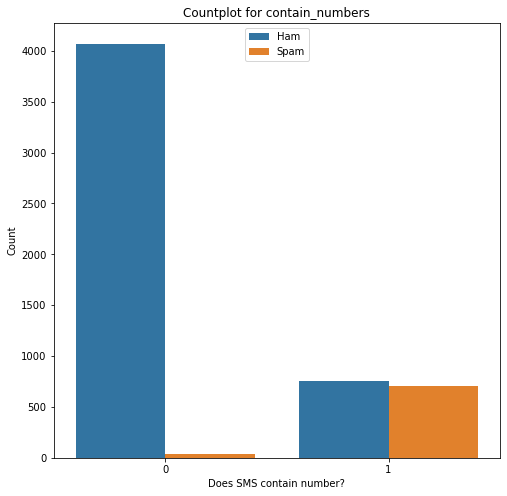

In [28]:
# Countplot for contains_number
plt.figure(figsize=(8,8))
g = sns.countplot(x='contains_number', data=df, hue='label')
p = plt.title('Countplot for contain_numbers')
p = plt.xlabel('Does SMS contain number?')
p = plt.ylabel('Count')
p = plt.legend(labels=['Ham', 'Spam'], loc=9)

_**Insight:** It is evident that **most of the Spam messages contain numbers,** and **majority of the Ham messages donot contain numbers.**_

# **Data Cleaning**
* Removing special character and numbers using regular expression
* Converting the entire sms into lower case
* Tokenizing the sms by words
* Removing the stop words
* Lemmatizing the words
* Joining the lemmatized words
* Building a corpus of messages

In [29]:
# Importing essential libraries for performing NLP
import nltk
import re
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91991\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\91991\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


In [32]:
# Cleaning the messages
corpus = []
wnl = WordNetLemmatizer()

for sms_string in list(df.message):

  # Cleaning special character from the sms
  message = re.sub(pattern='[^a-zA-Z]', repl=' ', string=sms_string)

  # Converting the entire sms into lower case
  message = message.lower()

  # Tokenizing the sms by words
  words = message.split()

  # Removing the stop words
  filtered_words = [word for word in words if word not in set(stopwords.words('english'))]

  # Lemmatizing the words
  lemmatized_words = [wnl.lemmatize(word) for word in filtered_words]

  # Joining the lemmatized words
  message = ' '.join(lemmatized_words)

  # Building a corpus of messages
  corpus.append(message)

In [33]:
corpus[0:3]

['go jurong point crazy available bugis n great world la e buffet cine got amore wat',
 'ok lar joking wif u oni',
 'free entry wkly comp win fa cup final tkts st may text fa receive entry question std txt rate c apply']

In [34]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=500)
vectors = tfidf.fit_transform(corpus).toarray()
feature_names = tfidf.get_feature_names()

# Extracting independent and dependent variables from the dataset
X = pd.DataFrame(vectors, columns=feature_names)
y = df['label']

# **Model Building & Evaluation**
_**Metric: F1-Score**_

* Multiomail Naive Bayes: 0.943
* Decision Tree: 0.98
* **Random Forest (Ensemble): 0.994**
* Voting (Multinomial Naive Bayes + Decision Tree): 0.98


In [35]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
cv = cross_val_score(mnb, X, y, scoring='f1', cv=10)
print('Average F1-Score for MNB model: {}'.format(round(cv.mean(), 3)))
print('Standard Deviation: {}'.format(round(cv.std(), 3)))

Average F1-Score for MNB model: 0.895
Standard Deviation: 0.015


In [39]:
# Classification report for MNB model
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
y_pred = mnb.predict(X_test)

print('Classification report for MNB model')
print(classification_report(y_test, y_pred))

Classification report for MNB model
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       966
           1       0.98      0.87      0.92       149

    accuracy                           0.98      1115
   macro avg       0.98      0.93      0.95      1115
weighted avg       0.98      0.98      0.98      1115



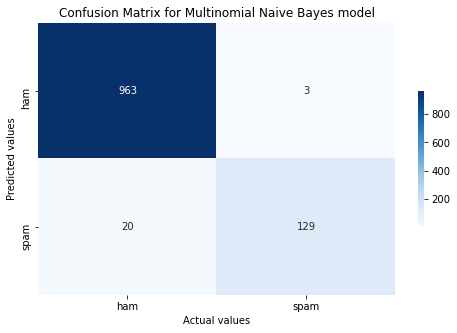

In [40]:
# Confusion matrix of MNB model
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,5))
axis_labels = ['ham', 'spam']
g = sns.heatmap(data=cm, annot=True, cmap="Blues", xticklabels=axis_labels, yticklabels=axis_labels, fmt='g', cbar_kws={"shrink": 0.5})
p = plt.xlabel('Actual values')
p = plt.ylabel('Predicted values')
p = plt.title('Confusion Matrix for Multinomial Naive Bayes model')

In [41]:
# Fitting Random Forest to the Training set
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
cv = cross_val_score(dt, X, y, scoring='f1', cv=10)
print('Average F1-Score for Decision Tree model: {}'.format(round(cv.mean(), 3)))
print('Standard Deviation: {}'.format(round(cv.std(), 3)))

Average F1-Score for Decision Tree model: 0.863
Standard Deviation: 0.026


In [42]:
# Classification report for Decision Tree model
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

print('--- Classification report for Decision Tree model ---')
print(classification_report(y_test, y_pred))

--- Classification report for Decision Tree model ---
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       966
           1       0.90      0.86      0.88       149

    accuracy                           0.97      1115
   macro avg       0.94      0.92      0.93      1115
weighted avg       0.97      0.97      0.97      1115



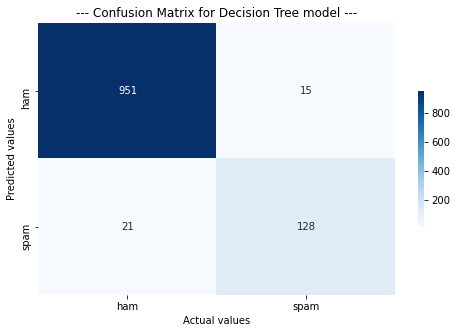

In [43]:
# Confusion matrix of Decision Tree model
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,5))
axis_labels = ['ham', 'spam']
g = sns.heatmap(data=cm, annot=True, cmap="Blues", xticklabels=axis_labels, yticklabels=axis_labels, fmt='g', cbar_kws={"shrink": 0.5})
p = plt.xlabel('Actual values')
p = plt.ylabel('Predicted values')
p = plt.title('--- Confusion Matrix for Decision Tree model ---')

In [44]:
# Fitting Random Forest to the Training set
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=10)
cv = cross_val_score(rf, X, y, scoring='f1', cv=10)
print('--- Average F1-Score for Random Forest model: {} ---'.format(round(cv.mean(), 3)))
print('Standard Deviation: {}'.format(round(cv.std(), 3)))

--- Average F1-Score for Random Forest model: 0.909 ---
Standard Deviation: 0.024


In [45]:
# Classification report for Random Forest model
rf = RandomForestClassifier(n_estimators=20)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print('--- Classification report for Random Forest model ---')
print(classification_report(y_test, y_pred))

--- Classification report for Random Forest model ---
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       966
           1       0.98      0.87      0.93       149

    accuracy                           0.98      1115
   macro avg       0.98      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115



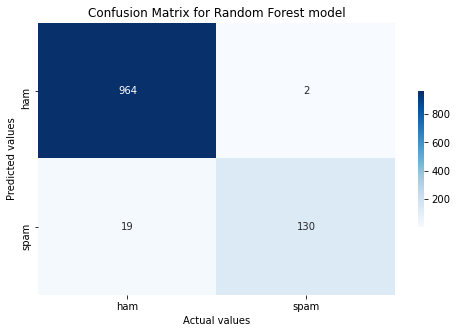

In [47]:
# Confusion matrix of Random Forest model
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,5))
axis_labels = ['ham', 'spam']
g = sns.heatmap(data=cm, annot=True, cmap="Blues", xticklabels=axis_labels, yticklabels=axis_labels, fmt='g', cbar_kws={"shrink": 0.5})
p = plt.xlabel('Actual values')
p = plt.ylabel('Predicted values')
p = plt.title('Confusion Matrix for Random Forest model')

_**Note:** Decision Tree & MNB algorithms are selected and fed to Voting algorithm to increase the F1-Score!_

In [49]:
# Fitting Decision Tree and MNB to VotingClassifier
from sklearn.ensemble import VotingClassifier
vc = VotingClassifier([('decision_tree', dt), ('m_naive_bayes', mnb)], weights=[2,1])
cv = cross_val_score(vc, X, y, cv=10, scoring='f1')

print('Average F1-Score for VotingClassifier model: {}'.format(round(cv.mean(), 3)))
print('Standard Deviation: {}'.format(round(cv.std(), 3)))

Average F1-Score for VotingClassifier model: 0.865
Standard Deviation: 0.025


_**Note:** Voting algorithm did not out-perform Random Forest algorithm, hence **Random Forest algorithm is selected for predicting the results of this problem statement.**_


# **Making Predictions**

In [50]:
def predict_spam(sample_message):
  sample_message = re.sub(pattern='[^a-zA-Z]',repl=' ', string = sample_message)
  sample_message = sample_message.lower()
  sample_message_words = sample_message.split()
  sample_message_words = [word for word in sample_message_words if not word in set(stopwords.words('english'))]
  final_message = [wnl.lemmatize(word) for word in sample_message_words]
  final_message = ' '.join(final_message)

  temp = tfidf.transform([final_message]).toarray()
  return rf.predict(temp)

In [52]:
# Prediction 1 - Lottery text message
sample_message = 'IMPORTANT - You could be entitled up to £3,160 in compensation from mis-sold PPI on a credit card or loan. Please reply PPI for info or STOP to opt out.'

if predict_spam(sample_message):
  print('Gotcha! This is a SPAM message.')
else:
  print('This is a HAM (normal) message.')

Gotcha! This is a SPAM message.


In [53]:
# Prediction 2 - Casual text chat
sample_message = 'Came to think of it. I have never got a spam message before.'

if predict_spam(sample_message):
  print('Gotcha! This is a SPAM message.')
else:
  print('This is a HAM (normal) message.')

This is a HAM (normal) message.


In [54]:
# Prediction 3 - Transaction confirmation text message
sample_message = 'Sam, your rent payment for Jan 19 has been received. $1,300 will be drafted from your Wells Fargo Account ******0000 within 24-48 business hours. Thank you!'

if predict_spam(sample_message):
  print('Gotcha! This is a SPAM message.')
else:
  print('This is a HAM (normal) message.')

This is a HAM (normal) message.


In [55]:
# Predicting values 4 - Feedback message
sample_message = 'Tammy, thanks for choosing Carl’s Car Wash for your express polish. We would love to hear your thoughts on the service. Feel free to text back with any feedback. Safe driving!'

if predict_spam(sample_message):
  print('Gotcha! This is a SPAM message.')
else:
  print('This is a HAM (normal) message.')

Gotcha! This is a SPAM message.


In [56]:
# Predicting values 5 - Feedback message
sample_message = 'You have still not claimed the compensation you are due for the accident you had. To start the process please reply YES. To opt out text STOP'

if predict_spam(sample_message):
  print('Gotcha! This is a SPAM message.')
else:
  print('This is a HAM (normal) message.')

This is a HAM (normal) message.


In [57]:
# Predicting values 6 - Feedback message
sample_message = 'A [redacted] loan for £950 is approved for you if you receive this SMS. 1 min verification & cash in 1 hr at www.[redacted].co.uk to opt out reply stop'

if predict_spam(sample_message):
  print('Gotcha! This is a SPAM message.')
else:
  print('This is a HAM (normal) message.')

Gotcha! This is a SPAM message.
